In [33]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 读取 Iris 数据集
iris = pd.read_csv('./Iris.csv')

# 查看数据的前几行
print("数据集前五行：")
print(iris.head())

# 提取特征和标签
# 假设最后一列是 'Species'
X = iris.iloc[:, :-1]  # 特征：除最后一列外的所有列
y = iris.iloc[:, -1]   # 标签：最后一列

# 将字符串标签转换为数值型标签
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 查看标签编码
print("\n标签编码示例：")
print(y_encoded[:10])

# 划分训练集和测试集（70% 训练，30% 测试）
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\n训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")


数据集前五行：
   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa

标签编码示例：
[0 0 0 0 0 0 0 0 0 0]

训练集大小: (105, 5)
测试集大小: (45, 5)


In [34]:
# 导入标准化处理库
from sklearn.preprocessing import StandardScaler

# 创建标准化对象
scaler = StandardScaler()

# 对训练集进行拟合和变换
X_train_scaled = scaler.fit_transform(X_train)

# 对测试集进行变换
X_test_scaled = scaler.transform(X_test)

# 查看标准化后的数据
print("\n标准化后的训练数据前五行：")
print(X_train_scaled[:5])



标准化后的训练数据前五行：
[[ 0.53726272 -0.90045861 -1.22024754 -0.4419858  -0.13661044]
 [-0.15718848  0.38036614 -1.87955796  0.40282929  0.38029394]
 [-1.29145876 -0.90045861  1.63676428 -1.2868009  -1.17041921]
 [ 1.57893951  1.07899781  0.31814344  1.19132338  1.41410271]
 [ 0.56041109 -0.20182693 -0.56093712  0.17754527  0.12184175]]


In [35]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 假设我们预测 'petal_width'
X_lr = X_train_scaled  # 使用所有特征
y_lr = y_train  # 实际上，这是分类标签，通常线性回归用于回归任务

# 由于 y_train 是分类标签，我们需要选择一个数值型目标
# 这里我们选择 'petal_width' 作为目标
y_lr = X_train['Petal.Width']

# 重新划分特征和目标
X_lr = X_train_scaled
y_lr = X_train['Petal.Width']

# 创建线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_lr, y_lr)

# 预测
y_pred_lr = lr_model.predict(X_test_scaled)

# 评估模型
mse = mean_squared_error(X_test['Petal.Width'], y_pred_lr)
r2 = r2_score(X_test['Petal.Width'], y_pred_lr)

print(f"\n线性回归模型的均方误差 (MSE): {mse:.2f}")
print(f"线性回归模型的决定系数 (R²): {r2:.2f}")



线性回归模型的均方误差 (MSE): 0.00
线性回归模型的决定系数 (R²): 1.00


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 假设你的数据集已经读取
data = iris

# 选择特征和目标值
X = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length']]  # 特征
y = data['Petal.Width']  # 目标值

# 分割训练集和测试集
X_train_lr, X_test_lr, y_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置 alpha 值
alpha = 0.1  # alpha 是正则化强度，越大正则化效果越强

# 训练 Ridge 回归模型
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_lr, y_lr)

# 预测 Ridge 模型
y_pred_ridge = ridge_model.predict(X_test_lr)

# 计算 Ridge 模型的均方误差
mse_ridge = mean_squared_error(y_test_lr, y_pred_ridge)
print(f"Ridge 回归的均方误差 (MSE): {mse_ridge}")

# 训练 Lasso 回归模型
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_lr, y_lr)

# 预测 Lasso 模型
y_pred_lasso = lasso_model.predict(X_test_lr)

# 计算 Lasso 模型的均方误差
mse_lasso = mean_squared_error(y_test_lr, y_pred_lasso)
print(f"Lasso 回归的均方误差 (MSE): {mse_lasso}")


Ridge 回归的均方误差 (MSE): 0.04621134785546967
Lasso 回归的均方误差 (MSE): 0.05175534674071506


In [37]:
# 导入决策树分类器
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 创建决策树模型
dt_model = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_model.fit(X_train_scaled, y_train)

# 预测测试集
y_pred_dt = dt_model.predict(X_test_scaled)

# 评估模型
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=le.classes_)

print(f"\n决策树分类器的准确率: {accuracy_dt:.2f}")
print("决策树分类器的混淆矩阵：")
print(cm_dt)
print("决策树分类器的分类报告：")
print(report_dt)



决策树分类器的准确率: 1.00
决策树分类器的混淆矩阵：
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
决策树分类器的分类报告：
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [38]:
# 使用 GridSearchCV 进行超参数调优
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建 GridSearchCV 对象
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 执行网格搜索
grid_search_dt.fit(X_train_scaled, y_train)

# 输出最佳参数
print(f"\n决策树最佳参数: {grid_search_dt.best_params_}")

# 使用最佳参数进行预测
y_pred_dt_best = grid_search_dt.best_estimator_.predict(X_test_scaled)

# 评估模型
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
print(f"调参后决策树分类器的准确率: {accuracy_dt_best:.2f}")



决策树最佳参数: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
调参后决策树分类器的准确率: 1.00


 随机森林分类器：RandomForestClassifier
随机森林通过构建多个决策树来提高分类性能和稳定性。

In [39]:
# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf_model = RandomForestClassifier(random_state=42)

# 训练模型
rf_model.fit(X_train_scaled, y_train)

# 预测测试集
y_pred_rf = rf_model.predict(X_test_scaled)

# 评估模型
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=le.classes_)

print(f"\n随机森林分类器的准确率: {accuracy_rf:.2f}")
print("随机森林分类器的混淆矩阵：")
print(cm_rf)
print("随机森林分类器的分类报告：")
print(report_rf)



随机森林分类器的准确率: 1.00
随机森林分类器的混淆矩阵：
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
随机森林分类器的分类报告：
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [40]:
# 使用 GridSearchCV 进行超参数调优
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 执行网格搜索
grid_search_rf.fit(X_train_scaled, y_train)

# 输出最佳参数
print(f"\n随机森林最佳参数: {grid_search_rf.best_params_}")

# 使用最佳参数进行预测
y_pred_rf_best = grid_search_rf.best_estimator_.predict(X_test_scaled)

# 评估模型
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"调参后随机森林分类器的准确率: {accuracy_rf_best:.2f}")



随机森林最佳参数: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
调参后随机森林分类器的准确率: 1.00


In [41]:
# 导入支持向量机分类器
from sklearn.svm import SVC

# 创建支持向量机分类器
svc_model = SVC(random_state=42)

# 训练模型
svc_model.fit(X_train_scaled, y_train)

# 预测测试集
y_pred_svc = svc_model.predict(X_test_scaled)

# 评估模型
accuracy_svc = accuracy_score(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc, target_names=le.classes_)

print(f"\n支持向量机分类器的准确率: {accuracy_svc:.2f}")
print("支持向量机分类器的混淆矩阵：")
print(cm_svc)
print("支持向量机分类器的分类报告：")
print(report_svc)



支持向量机分类器的准确率: 1.00
支持向量机分类器的混淆矩阵：
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
支持向量机分类器的分类报告：
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



调参细节：

C：惩罚参数，控制误分类的惩罚强度。较大的 C 值会尝试更好地分类训练数据，但可能导致过拟合。
kernel：核函数类型，如 'linear'、'rbf'、'poly' 等，不同核函数适用于不同的数据分布。
gamma：核函数的系数，影响决策边界的灵活性。

In [42]:
# 使用 GridSearchCV 进行超参数调优
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 执行网格搜索
grid_search_svc.fit(X_train_scaled, y_train)

# 输出最佳参数
print(f"\n支持向量机最佳参数: {grid_search_svc.best_params_}")

# 使用最佳参数进行预测
y_pred_svc_best = grid_search_svc.best_estimator_.predict(X_test_scaled)

# 评估模型
accuracy_svc_best = accuracy_score(y_test, y_pred_svc_best)
print(f"调参后支持向量机分类器的准确率: {accuracy_svc_best:.2f}")



支持向量机最佳参数: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
调参后支持向量机分类器的准确率: 0.98


In [43]:
# 导入评估方法
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 计算准确率
accuracy = accuracy_score(y_test, y_pred_rf_best)
print(f"\n随机森林调参后模型的准确率: {accuracy:.2f}")

# 打印混淆矩阵
cm = confusion_matrix(y_test, y_pred_rf_best)
print("混淆矩阵：")
print(cm)

# 打印分类报告
report = classification_report(y_test, y_pred_rf_best, target_names=le.classes_)
print("分类报告：")
print(report)



随机森林调参后模型的准确率: 1.00
混淆矩阵：
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
分类报告：
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



准确率 (accuracy_score)：分类正确的样本比例。
混淆矩阵 (confusion_matrix)：展示真实标签与预测标签的对应关系。
分类报告 (classification_report)：包含精准率、召回率和 F1 分数等详细指标。



每个主成分解释的方差比例: [0.74945324 0.18712459]
累计解释的方差比例: [0.74945324 0.93657783]


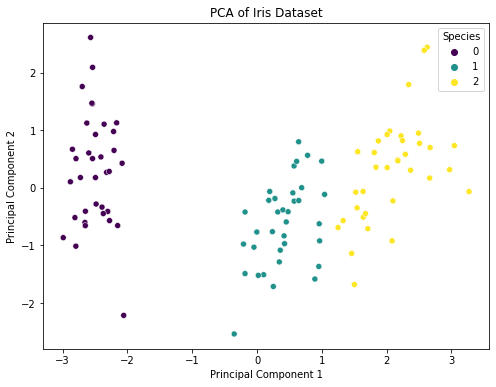

In [44]:
# 导入 PCA
from sklearn.decomposition import PCA

# 创建 PCA 对象，降到2个主成分
pca = PCA(n_components=2)

# 拟合 PCA 并转换数据
X_pca = pca.fit_transform(X_train_scaled)

# 查看主成分解释的方差比例
print(f"\n每个主成分解释的方差比例: {pca.explained_variance_ratio_}")
print(f"累计解释的方差比例: {pca.explained_variance_ratio_.cumsum()}")

# 可视化主成分
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个 DataFrame 存储 PCA 结果
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y_train

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()


调参细节：

n_components：选择主成分的数量，通常基于累计解释的方差比例。
说明：

PCA 可以帮助减少特征数量，同时保留数据中大部分的变异性。
可视化 PCA 结果有助于理解数据的分布和类别分离情况。

In [45]:
# 导入 K-Means
from sklearn.cluster import KMeans

# 创建 K-Means 对象，设置为3个簇
kmeans = KMeans(n_clusters=3, random_state=42)

# 训练模型
kmeans.fit(X_train_scaled)

# 预测簇标签
y_kmeans = kmeans.predict(X_test_scaled)

# 评估聚类效果（使用调整兰德指数）
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_test, y_kmeans)
print(f"\nK-Means 调整兰德指数 (ARI): {ari:.2f}")



K-Means 调整兰德指数 (ARI): 0.67


D:\Anaconda3\envs\mathjian\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\mathjian\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\mathjian\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\mathjian\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21017 (\N{CJK UNIFIED IDEOGRAPH-5219}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\mathjian\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_fig

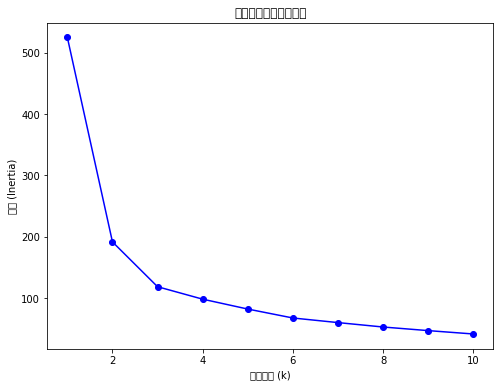

In [46]:
# 导入库
import matplotlib.pyplot as plt

# 计算不同簇数的惯性（簇内误差平方和）
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('簇的数量 (k)')
plt.ylabel('惯性 (Inertia)')
plt.title('肘部法则确定最佳簇数')
plt.show()



K-Means 调整兰德指数 (ARI): 0.62


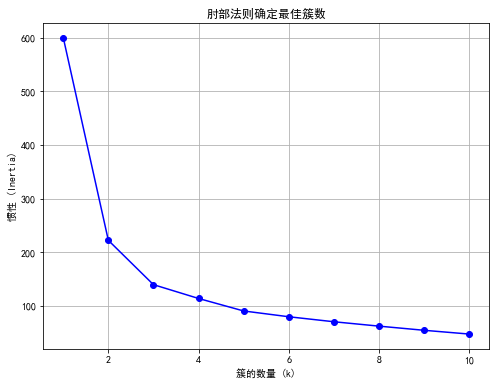

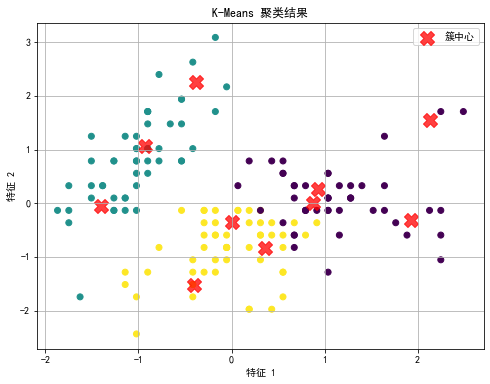

In [54]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import load_iris

# 加载数据（以鸢尾花数据集为例）
data = load_iris()
X = data.data
y = data.target

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建 K-Means 对象，设置为3个簇
kmeans = KMeans(n_clusters=3, random_state=42)

# 训练模型
kmeans.fit(X_scaled)

# 预测簇标签
y_kmeans = kmeans.predict(X_scaled)

# 评估聚类效果（使用调整兰德指数）
ari = adjusted_rand_score(y, y_kmeans)
print(f"\nK-Means 调整兰德指数 (ARI): {ari:.2f}")

# 确定最佳簇数示例（肘部法则）
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('簇的数量 (k)')
plt.ylabel('惯性 (Inertia)')
plt.title('肘部法则确定最佳簇数')
plt.grid()
plt.show()

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='簇中心')
plt.title('K-Means 聚类结果')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid()
plt.show()


In [24]:
# 导入交叉验证方法
from sklearn.model_selection import cross_val_score

# 创建随机森林分类器
rf_cv = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_split=2, min_samples_leaf=1, random_state=42)

# 进行 5 折交叉验证
cv_scores = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"\n随机森林分类器的交叉验证准确率: {cv_scores}")
print(f"平均交叉验证准确率: {cv_scores.mean():.2f}")



随机森林分类器的交叉验证准确率: [1. 1. 1. 1. 1.]
平均交叉验证准确率: 1.00


In [25]:
"""
以随机森林为例，展示以下
保存和加载模型的过程
使用 joblib 或 pickle 保存训练好的模型，以便以后使用。
"""

# 导入 joblib
import joblib

# 保存模型
joblib.dump(grid_search_rf.best_estimator_, 'random_forest_model.joblib')
print("\n模型已保存为 'random_forest_model.joblib'")

# 加载模型
loaded_rf = joblib.load('random_forest_model.joblib')

# 使用加载的模型进行预测
y_pred_loaded_rf = loaded_rf.predict(X_test_scaled)

# 评估
accuracy_loaded_rf = accuracy_score(y_test, y_pred_loaded_rf)
print(f"加载的随机森林分类器的准确率: {accuracy_loaded_rf:.2f}")



模型已保存为 'random_forest_model.joblib'
加载的随机森林分类器的准确率: 1.00


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 假设我们有一个 DataFrame iris_df，包含了鸢尾花数据
iris_df = pd.read_csv('iris.csv')  # 读取数据集

# 定义特征和目标变量
X = iris_df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]  # 特征
y = iris_df['Species']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印特征列名
print("特征列名:", X.columns)


特征列名: Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}

# 进行网格搜索
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# 确认模型训练完毕
print("最佳参数:", grid_search_rf.best_params_)


最佳参数: {'max_depth': None, 'n_estimators': 50}


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 假设你在这里定义了模型和参数网格
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}

# 进行网格搜索
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# 确认模型训练完毕
print("最佳参数:", grid_search_rf.best_params_)


最佳参数: {'max_depth': None, 'n_estimators': 50}


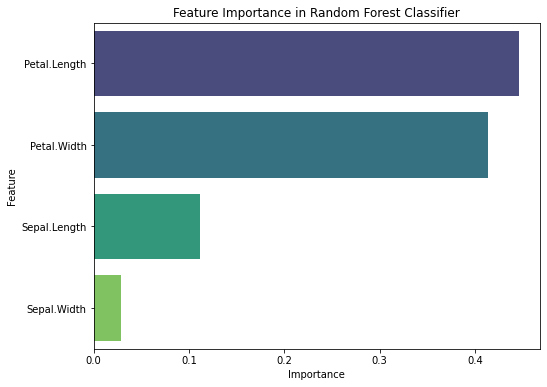

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 读取数据集
iris_df = pd.read_csv('iris.csv')

# 定义特征和目标变量
X = iris_df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris_df['Species']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林模型并进行网格搜索
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# 获取特征重要性
importances = grid_search_rf.best_estimator_.feature_importances_
feature_names = X.columns

# 检查特征名称和重要性数组的长度是否一致
if len(feature_names) != len(importances):
    raise ValueError(f"Length mismatch: {len(feature_names)} features vs {len(importances)} importances")

# 创建 DataFrame 存储特征重要性
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [55]:

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 设置字体为 SimHei，解决中文乱码问题
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为 SimHei
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题


